# Sleep analysis

It has been 6 months since I have been tracking my sleeping data. I bought a Samsung Galaxy Watch Active 2 which allows me to track every stages of my sleep, every night.

The goal of this project is to analyse my sleep and see if I can find any correlations between my sleep quality and other external factors.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
sleep_data = pd.read_csv('sleep_data_2021_02_09.csv', sep=';', skiprows=[0])

In [3]:
sleep_data.head(5)

,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid
0,2020-09-01 23:22:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-01 23:26:00.000,3713d761-0e35-bae5-ae2e-bdb42c2e1536
1,2020-09-01 23:49:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:06:00.000,72ec0096-b482-f885-2580-a6f95f91af15
2,2020-09-02 00:42:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:49:00.000,a25927cb-e04c-04d4-6231-032a60a218dc
3,2020-09-02 01:09:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 01:23:00.000,3a97ac3d-a55b-d34e-db1c-4b594e055823
4,2020-09-02 02:25:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 02:58:00.000,f12df4f9-97aa-6a4b-dd17-27f2d70b8c06


In [4]:
sleep_data.drop(['custom','sleep_id','deviceuuid','pkg_name','datauuid'],axis=1, inplace=True)

In [5]:
sleep_data

,start_time,update_time,create_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 02:58:00.000
...,...,...,...,...,...,...
12499,2021-02-09 15:14:00.000,09.02.21 17:27,09.02.21 17:27,40004,UTC+0100,2021-02-09 15:20:00.000
12500,2021-02-09 15:20:00.000,09.02.21 17:27,09.02.21 17:27,40002,UTC+0100,2021-02-09 15:26:00.000
12501,2021-02-09 15:26:00.000,09.02.21 17:27,09.02.21 17:27,40003,UTC+0100,2021-02-09 15:55:00.000
12502,2021-02-09 15:55:00.000,09.02.21 17:27,09.02.21 17:27,40002,UTC+0100,2021-02-09 16:00:00.000


In [6]:
#I decide to remove update_time and create_time because they do not look actionable compared to start_time
#and end_time
sleep_data.drop(['update_time','create_time'],axis=1, inplace=True)

In [7]:
sleep_data

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,40002,UTC+0200,2020-09-02 02:58:00.000
...,...,...,...,...
12499,2021-02-09 15:14:00.000,40004,UTC+0100,2021-02-09 15:20:00.000
12500,2021-02-09 15:20:00.000,40002,UTC+0100,2021-02-09 15:26:00.000
12501,2021-02-09 15:26:00.000,40003,UTC+0100,2021-02-09 15:55:00.000
12502,2021-02-09 15:55:00.000,40002,UTC+0100,2021-02-09 16:00:00.000


| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

In [8]:
#All the data was mixed up. In here I sort the values by start time.
sleep_data = sleep_data.sort_values('start_time').reset_index().drop('index',axis=1)

In [9]:
sleep_data

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000
...,...,...,...,...
12499,2021-02-09 17:18:00.000,40001,UTC+0100,2021-02-09 17:19:00.000
12500,2021-02-09 17:19:00.000,40002,UTC+0100,2021-02-09 17:20:00.000
12501,2021-02-09 17:20:00.000,40001,UTC+0100,2021-02-09 17:21:00.000
12502,2021-02-09 17:21:00.000,40002,UTC+0100,2021-02-09 17:23:00.000


In [10]:
sleep_data['start_time_date'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[0])
sleep_data['start_time_hour'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[1].split('.')[0])
sleep_data['end_time_date'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[0])
sleep_data['end_time_hour'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[1].split('.')[0])

In [11]:
sleep_data

,start_time,stage,time_offset,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000,2020-09-01,23:22:00,2020-09-01,23:26:00
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000,2020-09-01,23:26:00,2020-09-01,23:29:00
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000,2020-09-01,23:29:00,2020-09-01,23:30:00
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000,2020-09-01,23:30:00,2020-09-01,23:33:00
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000,2020-09-01,23:33:00,2020-09-01,23:43:00
...,...,...,...,...,...,...,...,...
12499,2021-02-09 17:18:00.000,40001,UTC+0100,2021-02-09 17:19:00.000,2021-02-09,17:18:00,2021-02-09,17:19:00
12500,2021-02-09 17:19:00.000,40002,UTC+0100,2021-02-09 17:20:00.000,2021-02-09,17:19:00,2021-02-09,17:20:00
12501,2021-02-09 17:20:00.000,40001,UTC+0100,2021-02-09 17:21:00.000,2021-02-09,17:20:00,2021-02-09,17:21:00
12502,2021-02-09 17:21:00.000,40002,UTC+0100,2021-02-09 17:23:00.000,2021-02-09,17:21:00,2021-02-09,17:23:00


In [12]:
def stage_pairing(x):
    if x == 40001:
        x = 'Awaken'
    elif x == 40002:
        x = 'Light'
    elif x == 40003:
        x = 'Deep'
    else:
        x = 'REM'
    return x

sleep_data['stage_of_sleep'] = sleep_data['stage'].apply(lambda x: stage_pairing(x))

In [13]:
sleep_data

,start_time,stage,time_offset,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000,2020-09-01,23:29:00,2020-09-01,23:30:00,Light
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000,2020-09-01,23:33:00,2020-09-01,23:43:00,Light
...,...,...,...,...,...,...,...,...,...
12499,2021-02-09 17:18:00.000,40001,UTC+0100,2021-02-09 17:19:00.000,2021-02-09,17:18:00,2021-02-09,17:19:00,Awaken
12500,2021-02-09 17:19:00.000,40002,UTC+0100,2021-02-09 17:20:00.000,2021-02-09,17:19:00,2021-02-09,17:20:00,Light
12501,2021-02-09 17:20:00.000,40001,UTC+0100,2021-02-09 17:21:00.000,2021-02-09,17:20:00,2021-02-09,17:21:00,Awaken
12502,2021-02-09 17:21:00.000,40002,UTC+0100,2021-02-09 17:23:00.000,2021-02-09,17:21:00,2021-02-09,17:23:00,Light


In [14]:
sleep_data.drop(['start_time','stage','time_offset','end_time'], axis=1, inplace=True)

In [15]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light


In [16]:
#Dates and hours are strings. I need to find a way to translate them into time values. I want to create a new
#column "Duration" to calculate the duration of each sleeping phase.

In [17]:
sleep_data['Duration'] = 0

for i in range(0,len(sleep_data)):
    sleep_data['Duration'].loc[i] = str((datetime.datetime.strptime(sleep_data['end_time_hour'].loc[i], '%H:%M:%S') - datetime.datetime.strptime(sleep_data['start_time_hour'].loc[i], '%H:%M:%S')))
    if sleep_data['Duration'].loc[i].find('day')!=-1:
        sleep_data['Duration'].loc[i] = sleep_data['Duration'].loc[i].split(', ')[1]
sleep_data['Duration'] = pd.to_timedelta(sleep_data['Duration'],errors='ignore')

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00


In [19]:
sleep_data['start_time_date_reworked']=0
for i in range(0, len(sleep_data)):
    if sleep_data['start_time_hour'].loc[i]>'21:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')
    elif sleep_data['start_time_hour'].loc[i] < '13:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d') - datetime.timedelta(days=1)
    elif sleep_data['start_time_hour'].loc[i] >= '13:00:00' and sleep_data['start_time_hour'].loc[i] <= '21:00:00':
        sleep_data.drop(i,inplace=True)
    else:
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')

In [20]:
#pd.set_option('display.max_rows', len(sleep_data))

sleep_data

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
12456,2021-02-09,07:48:00,2021-02-09,07:49:00,Awaken,00:01:00,2021-02-08 00:00:00
12457,2021-02-09,07:49:00,2021-02-09,07:52:00,Light,00:03:00,2021-02-08 00:00:00
12458,2021-02-09,07:52:00,2021-02-09,07:54:00,Awaken,00:02:00,2021-02-08 00:00:00
12459,2021-02-09,07:54:00,2021-02-09,07:58:00,Light,00:04:00,2021-02-08 00:00:00


In [21]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00


In [22]:
sleep_data_gb = sleep_data[['start_time_date_reworked','stage_of_sleep','Duration']]

In [23]:
sleep_data_gb.head()

,start_time_date_reworked,stage_of_sleep,Duration
0,2020-09-01 00:00:00,Awaken,00:04:00
1,2020-09-01 00:00:00,Deep,00:03:00
2,2020-09-01 00:00:00,Light,00:01:00
3,2020-09-01 00:00:00,Deep,00:03:00
4,2020-09-01 00:00:00,Light,00:10:00


In [24]:
sleep_data_final = sleep_data_gb.groupby(['start_time_date_reworked','stage_of_sleep']).sum().unstack().reset_index()
sleep_data_final.columns = sleep_data_final.columns.get_level_values(1)
sleep_data_final = pd.DataFrame(sleep_data_final)
sleep_data_final.columns = ['Date','Awaken','Deep','Light','REM']
#sleep_data_final.replace('NaT',0,inplace=True)
sleep_data_final.fillna(0,inplace=True)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


In [25]:
sleep_data_final['Total'] = sleep_data_final['Awaken']+sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']

In [26]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00


In [27]:
sleep_data_final['Weekend'] = 0
for i in range(0, len(sleep_data_final)):
    if datetime.date.weekday(sleep_data_final['Date'].loc[i]) < 5:
        sleep_data_final['Weekend'].loc[i] = 0
    else:
        sleep_data_final['Weekend'].loc[i] = 1

In [28]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [63]:
sleep_data_final['Total'].min()

Timedelta('0 days 04:30:00')

In [30]:
sleep_data_final['Total'].max()

Timedelta('0 days 11:02:00')

In [31]:
sleep_data_final[sleep_data_final['Weekend']==0]['Total'].mean()

Timedelta('0 days 07:45:09.913043')

In [32]:
sleep_data_final[sleep_data_final['Weekend']==1]['Total'].mean()

Timedelta('0 days 07:33:24')

In [33]:
sleep_data_final['Awaken'].mean()

Timedelta('0 days 00:49:31.125000')

In [34]:
sleep_data_final['Deep'].mean()

Timedelta('0 days 00:41:52.125000')

In [35]:
sleep_data_final['Light'].mean()

Timedelta('0 days 04:58:55.125000')

In [36]:
sleep_data_final['REM'].mean()

Timedelta('0 days 01:11:33')

In [76]:
(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).mean()

Timedelta('0 days 06:52:20.250000')

In [74]:
(sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')).std()

69.48796443455416

Text(0, 0.5, 'Minutes asleep')

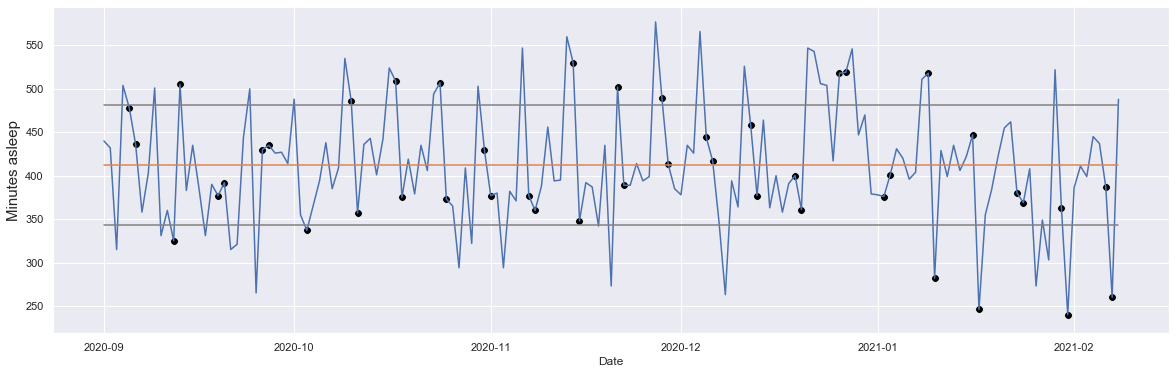

In [121]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Minutes asleep', fontsize=15)

In here I only took into account minutes asleep: Deep+Light+REM without taking into account awake time. The orange line is the average number of minutes asleep, the grey ones are the standard deviation and the black dots are the weekend days.

# Analysis per hour

In [37]:
sleep_data_per_hour = sleep_data

In [38]:
def hour_matching(x):
    if x >= '00:00:00' and x < '01:00:00':
        x = '00:00:00'
    elif x >= '01:00:00' and x < '02:00:00':
        x = '01:00:00'
    elif x >= '02:00:00' and x < '03:00:00':
        x = '02:00:00'
    elif x >= '03:00:00' and x < '04:00:00':
        x = '03:00:00'
    elif x >= '04:00:00' and x < '05:00:00':
        x = '04:00:00'
    elif x >= '05:00:00' and x < '06:00:00':
        x = '05:00:00'
    elif x >= '06:00:00' and x < '07:00:00':
        x = '06:00:00'
    elif x >= '07:00:00' and x < '08:00:00':
        x = '07:00:00'
    elif x >= '08:00:00' and x < '09:00:00':
        x = '08:00:00'
    elif x >= '09:00:00' and x < '10:00:00':
        x = '09:00:00'
    elif x >= '10:00:00' and x < '11:00:00':
        x = '10:00:00'
    elif x >= '11:00:00' and x < '12:00:00':
        x = '11:00:00'
    elif x >= '12:00:00' and x < '13:00:00':
        x = '12:00:00'
    elif x >= '13:00:00' and x < '14:00:00':
        x = '13:00:00'
    elif x >= '14:00:00' and x < '15:00:00':
        x = '14:00:00'
    elif x >= '15:00:00' and x < '16:00:00':
        x = '15:00:00'
    elif x >= '16:00:00' and x < '17:00:00':
        x = '16:00:00'
    elif x >= '17:00:00' and x < '18:00:00':
        x = '17:00:00'
    elif x >= '18:00:00' and x < '19:00:00':
        x = '18:00:00'
    elif x >= '19:00:00' and x < '20:00:00':
        x = '19:00:00'
    elif x >= '20:00:00' and x < '21:00:00':
        x = '20:00:00'
    elif x >= '21:00:00' and x < '22:00:00':
        x = '21:00:00'
    elif x >= '22:00:00' and x < '23:00:00':
        x = '22:00:00'
    elif x >= '23:00:00' and x <= '23:59:00':
        x = '23:00:00'
    return x

In [39]:
sleep_data_per_hour['start_time_hour']=sleep_data_per_hour['start_time_hour'].apply(lambda x: hour_matching(x))

In [40]:
sleep_data_per_hour

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:00:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:00:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:00:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:00:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:00:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
12456,2021-02-09,07:00:00,2021-02-09,07:49:00,Awaken,00:01:00,2021-02-08 00:00:00
12457,2021-02-09,07:00:00,2021-02-09,07:52:00,Light,00:03:00,2021-02-08 00:00:00
12458,2021-02-09,07:00:00,2021-02-09,07:54:00,Awaken,00:02:00,2021-02-08 00:00:00
12459,2021-02-09,07:00:00,2021-02-09,07:58:00,Light,00:04:00,2021-02-08 00:00:00


In [41]:
sleep_data_per_hour = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration']].groupby(['start_time_hour','stage_of_sleep']).sum().reset_index()

In [42]:
sleep_data_per_hour

,start_time_hour,stage_of_sleep,Duration
0,00:00:00,Awaken,0 days 04:56:00
1,00:00:00,Deep,0 days 07:10:00
2,00:00:00,Light,1 days 07:21:00
3,00:00:00,REM,0 days 05:17:00
4,01:00:00,Awaken,0 days 08:28:00
...,...,...,...
58,22:00:00,REM,0 days 00:55:00
59,23:00:00,Awaken,0 days 02:22:00
60,23:00:00,Deep,0 days 02:22:00
61,23:00:00,Light,0 days 10:50:00


In [43]:
sleep_data_per_hour['Duration (%)'] = 0
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'21:00:00','stage_of_sleep':'REM','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)
#sleep_data_per_hour.index = sleep_data_per_hour.index+1
for i in range(0,len(sleep_data_per_hour),4):
    sleep_data_per_hour['Duration (%)'].loc[i] = sleep_data_per_hour['Duration'].loc[i] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+1] = sleep_data_per_hour['Duration'].loc[i+1] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+2] = sleep_data_per_hour['Duration'].loc[i+2] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+3] = sleep_data_per_hour['Duration'].loc[i+3] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])    

In [44]:
sleep_data_per_hour.head()

,start_time_hour,stage_of_sleep,Duration,Duration (%)
0,00:00:00,Awaken,0 days 04:56:00,0.101231
1,00:00:00,Deep,0 days 07:10:00,0.147059
2,00:00:00,Light,1 days 07:21:00,0.643297
3,00:00:00,REM,0 days 05:17:00,0.108413
4,01:00:00,Awaken,0 days 08:28:00,0.083238


In [45]:
sleep_data_per_hour_pivot = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration (%)']].pivot(index='start_time_hour',columns='stage_of_sleep',values='Duration (%)')

In [46]:
sleep_data_per_hour_pivot

stage_of_sleep,Awaken,Deep,Light,REM
start_time_hour,,,,
00:00:00,0.101231,0.147059,0.643297,0.108413
01:00:00,0.083238,0.144355,0.645256,0.127151
02:00:00,0.084312,0.142438,0.634086,0.139165
03:00:00,0.085264,0.095314,0.652809,0.166614
04:00:00,0.058243,0.102739,0.693514,0.145505
05:00:00,0.058641,0.085740,0.666704,0.188916
06:00:00,0.078166,0.060872,0.681306,0.179656
07:00:00,0.171069,0.042180,0.645139,0.141613
08:00:00,0.204913,0.043039,0.634355,0.117692


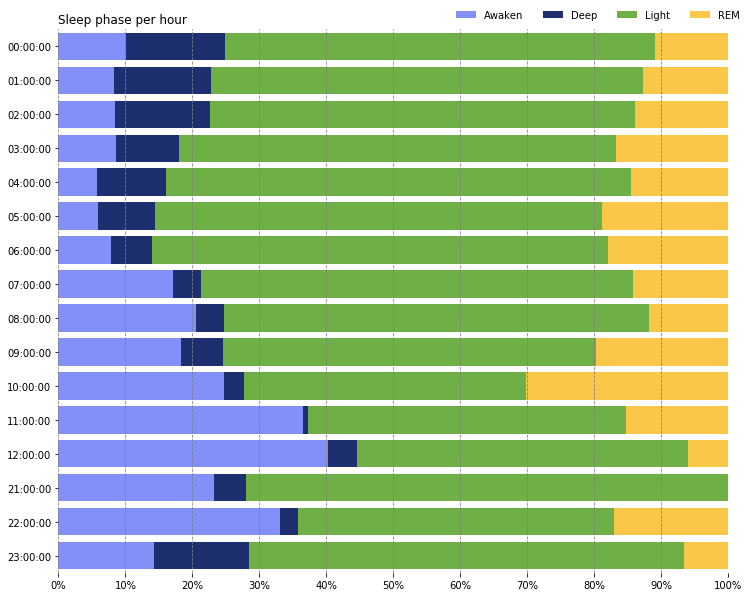

In [47]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per hour'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_per_hour_pivot.sort_values('start_time_hour',ascending=False), labels, colors, title, subtitle)

| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*